
# 1. **Data analysis**



```
# Tiene formato de código
```

## Import Librabries

In [2]:
#Matrix Calculation
import numpy as np 

#Data Manipulation
import pandas as pd 

#To Plot Graphs
import matplotlib.pyplot as plt 

#Statistical Visualization 
import seaborn as sns

#Oversampling
from imblearn.over_sampling import SMOTE

import optuna

In [3]:
#Read CSV FILE and copy it into the variable
dataset=pd.read_csv("../data/input_data/survey lung cancer.csv")


In [4]:
#Know rows and columns
dataset.shape

(309, 16)

In [5]:
#Print 10 Rows from Data
dataset.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
67,M,66,2,1,1,1,1,2,1,2,2,2,2,1,1,YES
266,F,55,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
188,M,65,2,2,2,2,2,1,1,1,1,1,1,1,1,YES
26,F,61,2,2,2,1,1,2,2,1,2,1,2,2,2,YES
195,M,69,1,2,2,1,1,1,1,2,2,2,2,2,1,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
162,F,73,2,1,1,2,1,2,2,2,2,2,1,2,2,YES
164,F,75,1,2,1,2,2,2,2,1,2,2,1,1,1,YES
182,M,71,1,1,1,1,2,2,2,2,2,2,2,1,2,YES
15,F,48,1,2,2,2,2,2,2,2,1,2,2,2,1,YES


In [6]:
#Print Columns
dataset.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [7]:
#Get to know the data types that exist in data
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [8]:
#Summary of data
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Data Formatting

In [9]:
#Case Formatting
dataset.columns=dataset.columns.str.title()

In [10]:
#Check Fomatting
dataset.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [11]:
#Check Formatiing
dataset.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain', 'Lung_Cancer'],
      dtype='object')

In [12]:
#Change data for better understanding
dataset["Gender"]=dataset["Gender"].replace(["M","F"],["Male","Female"])

#Replace 1&2 with 0&1 for better understanding
col=["Smoking","Yellow_Fingers","Anxiety","Peer_Pressure","Chronic Disease","Fatigue ","Allergy ","Wheezing","Alcohol Consuming","Coughing","Shortness Of Breath","Swallowing Difficulty","Chest Pain"]
for x in col:
        dataset[x]=dataset[x].replace([1,2],[0,1])

In [13]:
#Verify Changes
dataset.head(10)

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
5,Female,75,0,1,0,0,1,1,1,1,0,1,1,0,0,YES
6,Male,52,1,0,0,0,0,1,0,1,1,1,1,0,1,YES
7,Female,51,1,1,1,1,0,1,1,0,0,0,1,1,0,YES
8,Female,68,1,0,1,0,0,1,0,0,0,0,0,0,0,NO
9,Male,53,1,1,1,1,1,0,1,0,1,0,0,1,1,YES


In [14]:
#Print whole table
dataset

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,Male,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,Male,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,Male,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


## Feature Engineering

In [15]:
#Store agewise records for better access
dataset.loc[(dataset['Age'] >= 0) & (dataset["Age"] <= 9),"n_age"]="In 0's"
dataset.loc[(dataset['Age'] >= 10) & (dataset["Age"] <= 19),"n_age"]="In 10's"
dataset.loc[(dataset['Age'] >= 20) & (dataset["Age"] <= 29),"n_age"]="In 20's"
dataset.loc[(dataset['Age'] >= 30) & (dataset["Age"] <= 39),"n_age"]="In 30's"
dataset.loc[(dataset['Age'] >= 40) & (dataset["Age"] <= 49),"n_age"]="In 40's"
dataset.loc[(dataset['Age'] >= 50) & (dataset["Age"] <= 59),"n_age"]="In 50's"
dataset.loc[(dataset['Age'] >= 60) & (dataset["Age"] <= 69),"n_age"]="In 60's"
dataset.loc[(dataset['Age'] >= 70) & (dataset["Age"] <= 79),"n_age"]="In 70's"
dataset.loc[(dataset['Age'] >= 80) & (dataset["Age"] <= 89),"n_age"]="In 80's"

## Data Analysis

In [16]:
#Identify Genders
dataset["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [17]:
#Identify number of males and females in records
gender_type_count=dataset["Gender"].value_counts()
gender_type_count

Gender
Male      162
Female    147
Name: count, dtype: int64

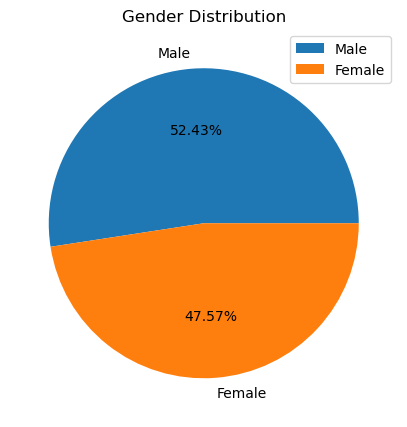

In [18]:
#Plotting a pie chart for gender distribution

plt.figure(figsize=(5,7))
values=gender_type_count.values
labels=gender_type_count.index
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("Gender Distribution")
plt.legend(["Male","Female"])
plt.show()

In [19]:
#Data in group for genders
dataset.groupby(["Gender","Lung_Cancer"]).agg(total_cancer=("Lung_Cancer","count"),minimum_age=("Age","min"),maximum_age=("Age","max")).reset_index()

,Gender,Lung_Cancer,total_cancer,minimum_age,maximum_age
0,Female,NO,22,21,87
1,Female,YES,125,38,81
2,Male,NO,17,46,69
3,Male,YES,145,39,79


Text(0.5, 1.0, 'Gender Vs. Lung Cancer')

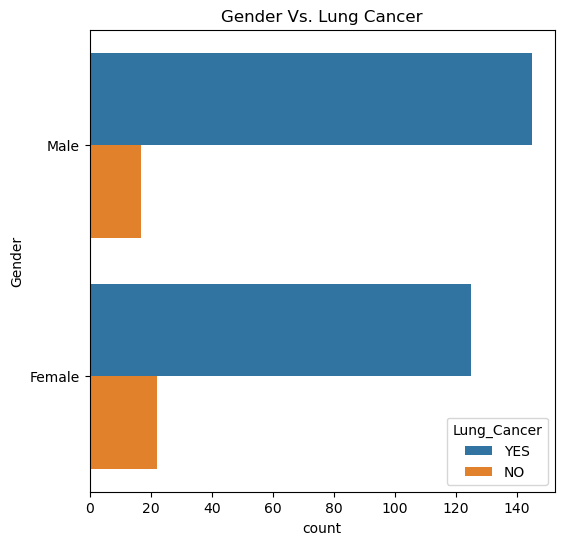

In [20]:
#Plot Chart for Group Data Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=dataset,y="Gender",hue="Lung_Cancer")
plt.title("Gender Vs. Lung Cancer")

## Identify Age Factor

In [21]:
#Print minimum age
dataset["Age"].min()

21

In [22]:
#Print maximum age
dataset["Age"].max()

87

In [23]:
#Print whole dataset
dataset

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain,Lung_Cancer,n_age
0,Male,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES,In 60's
1,Male,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES,In 70's
2,Female,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO,In 50's
3,Male,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO,In 60's
4,Female,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO,In 60's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Female,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES,In 50's
305,Male,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES,In 70's
306,Male,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES,In 50's
307,Male,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES,In 60's


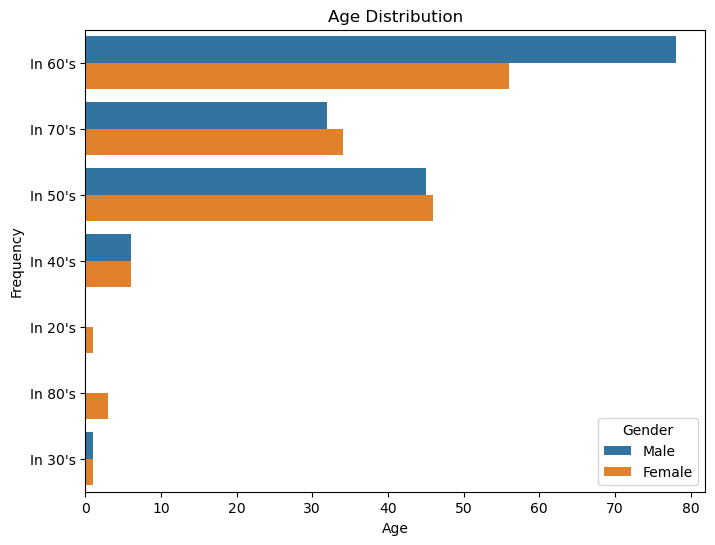

In [24]:
#Plot chart for age distribution
plt.figure(figsize=(8,6))
sns.countplot(y="n_age",hue="Gender",data=dataset) #n_age is the label taken from feature enginnering

#Details
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

#Print
plt.show()

## Alcohol Consumption Factor

In [25]:
#identify all types of unique values present in column "Alcohol Consuming"
dataset["Alcohol Consuming"].unique()

array([1, 0])

In [26]:
#Find the number of people who drink and those who don't
alcohol_con=dataset["Alcohol Consuming"].value_counts(sort=True)
alcohol_con

Alcohol Consuming
1    172
0    137
Name: count, dtype: int64

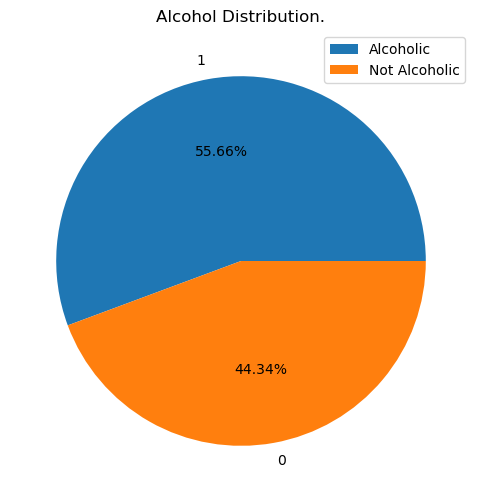

In [27]:
#Plot Alochol Disyrubution using Pie Chart
labels=alcohol_con.index
values=alcohol_con.values
plt.figure(figsize=(8,6))
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.title("Alcohol Distribution.")
plt.legend(["Alcoholic","Not Alcoholic"],loc="upper right") #To print ref box
plt.show()

In [28]:
#Build Table to see the impact of alcohol Consumption on Lung Cancer
dataset.groupby(["Alcohol Consuming","Lung_Cancer"]).agg(Total=("Lung_Cancer","count"))

Total
Alcohol Consuming Lung_Cancer       
0                 NO              32
                  YES            105
1                 NO               7
                  YES            165

Text(0.5, 1.0, 'Alcohol Vs. Lung Cancer')

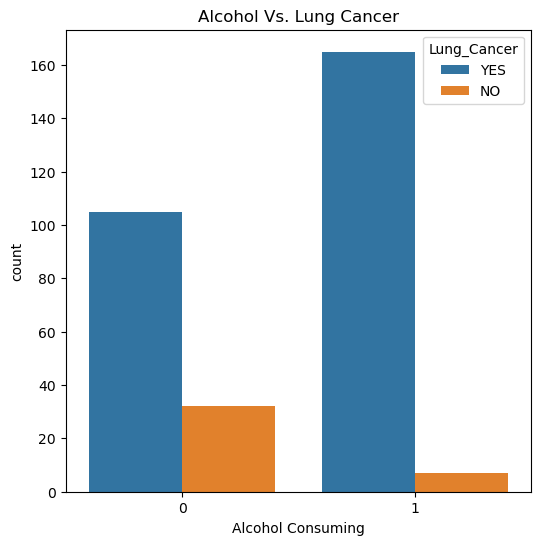

In [29]:
#Plot Chart for Alcohol and Lung Cancer Data Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=dataset,x="Alcohol Consuming",hue="Lung_Cancer")
plt.title("Alcohol Vs. Lung Cancer")

#### From the above chart we can say that alocohol has minor connection with lung cancer as the distribution here is very much same. A slight impact can be considered here, however, alochol consumption with other factors might lead directly towards the Lung Cancer.

In [30]:
#Build table to display lung cancer distribution - agewise
dataset.groupby(["n_age","Lung_Cancer"]).agg(Total=("Lung_Cancer","count")).reset_index()

,n_age,Lung_Cancer,Total
0,In 20's,NO,1
1,In 30's,YES,2
2,In 40's,NO,2
3,In 40's,YES,10
4,In 50's,NO,13
5,In 50's,YES,78
6,In 60's,NO,20
7,In 60's,YES,114
8,In 70's,NO,2
9,In 70's,YES,64


# Machine learning

## Import Libraries

In [31]:
#Machine Learining using Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import mean_absolute_error

## Data Preprocessing

In [32]:
#Data should be in a binary for efficient performance. 
#We replace Genders and Lung Cancer coulmn values with 1 and 0
#Other values were replaced earlier.

dataset["Gender"]=dataset["Gender"].replace(["Male","Female"],[1,0])
dataset["Lung_Cancer"]=dataset["Lung_Cancer"].replace(["YES","NO"],[1,0])

## Data splitting for better data validation and output

In [35]:
#Include all columns except prediction column and n_age which was made for better insights.
#del dataset['n_age']
X=dataset.drop(["Lung_Cancer"],axis=1)

#Preiction Column
y=dataset["Lung_Cancer"].values

In [36]:
#Data Split using test_train_split fuction
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [37]:
#Print the splitted output values
print(f"Size of X_train before oversampling: {xtrain.shape[0]}")
xtrain,ytrain = SMOTE(random_state=0).fit_resample(xtrain, ytrain)
print(f"Size of X_train after oversampling: {xtrain.shape[0]}")

Size of X_train before oversampling: 216
Size of X_train after oversampling: 380


## Model Training

In [38]:
#Call function for model training
lr=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
lr.fit(xtrain,ytrain)

LogisticRegression(solver='liblinear')

In [39]:
#Predict the values
predicted_value=lr.predict(xtest)
predicted_value

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0])

## Compare the data with actual outputs

In [40]:
comparation=pd.DataFrame({"Actual Value":ytest,"Predicted Value":predicted_value})
comparation.sample(10)

,Actual Value,Predicted Value
66,1,1
77,0,0
9,1,1
30,1,1
86,1,1
11,1,1
60,1,1
51,1,1
74,0,0
22,1,1


## Model Evalution

In [41]:
av=comparation["Actual Value"]
pv=comparation["Predicted Value"]
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)

Accuracy score:  0.9032258064516129
Precision score:  0.927710843373494
Recall score:  0.9625


## Lets check outputs using the Random Forrest Algorithm Now

In [42]:
#Import Library
from sklearn.ensemble import RandomForestRegressor

In [43]:
#Include all columns except prediction column and n_age which was made for better insights.
rf_X=dataset.drop(["Lung_Cancer"],axis=1)

#Preiction Column
rf_y=dataset["Lung_Cancer"]

In [44]:
#Data Split using test_train_split fuction
rf_xtrain,rf_xtest,rf_ytrain,rf_ytest=train_test_split(rf_X,rf_y,test_size=0.2)

In [45]:
#Print the splitted output values
rf_ytest

274    1
225    1
3      0
228    1
210    1
      ..
246    1
4      0
37     0
38     1
271    1
Name: Lung_Cancer, Length: 62, dtype: int64

In [46]:
rf_xtrain.columns

Index(['Gender', 'Age', 'Smoking', 'Yellow_Fingers', 'Anxiety',
       'Peer_Pressure', 'Chronic Disease', 'Fatigue ', 'Allergy ', 'Wheezing',
       'Alcohol Consuming', 'Coughing', 'Shortness Of Breath',
       'Swallowing Difficulty', 'Chest Pain'],
      dtype='object')

In [47]:
#Implement Model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(rf_xtrain, rf_ytrain)
forest_predict = forest_model.predict(rf_xtest)
forest_predict

array([1.  , 0.98, 0.89, 0.72, 0.97, 0.91, 1.  , 0.95, 1.  , 1.  , 1.  ,
       0.98, 0.99, 0.78, 1.  , 1.  , 0.96, 0.97, 0.97, 0.81, 0.91, 0.95,
       1.  , 1.  , 0.65, 1.  , 0.69, 0.79, 1.  , 0.89, 0.91, 0.28, 1.  ,
       0.99, 1.  , 0.85, 0.53, 0.95, 1.  , 0.89, 0.9 , 0.69, 1.  , 0.61,
       0.95, 1.  , 0.86, 0.96, 0.97, 1.  , 0.99, 1.  , 0.99, 0.41, 0.95,
       0.96, 0.98, 0.99, 0.3 , 0.76, 0.74, 1.  ])

In [48]:
import pickle
filename = 'model.pkl'
pickle.dump(forest_model, open(filename, 'wb'))

## Comparison of outputs now

In [49]:
comparation_1=pd.DataFrame({"Actual Value":rf_ytest,"Predicted Value RF":np.where(forest_predict>0.5,1,0)})
comparation_1.sample(10)

,Actual Value,Predicted Value RF
266,0,1
271,1,1
146,1,1
3,0,1
221,0,0
0,1,1
293,1,1
208,1,1
180,1,1
238,1,1


In [50]:
av=comparation_1["Actual Value"]
pv=comparation_1["Predicted Value RF"]
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)

Accuracy score:  0.8709677419354839
Precision score:  0.864406779661017
Recall score:  1.0


## We can conclude that, Here, Logistic Regression and Random Forrest Perform Equally. 

In [53]:
xtrain

,Gender,Age,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Chronic Disease,Fatigue,Allergy,Wheezing,Alcohol Consuming,Coughing,Shortness Of Breath,Swallowing Difficulty,Chest Pain
147,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0
91,0,71,0,0,0,0,1,1,1,0,0,1,1,0,1
121,1,64,0,0,0,0,1,1,1,1,1,1,1,0,1
56,0,63,0,1,0,1,0,1,0,0,0,1,1,0,1
68,0,76,1,1,1,1,0,1,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0,61,0,1,1,1,0,0,1,1,0,1,0,1,0
193,0,64,0,0,0,1,1,0,0,0,0,0,0,0,0
178,0,61,1,1,1,1,0,1,1,0,0,0,1,1,1
251,0,64,1,1,1,1,1,1,1,1,0,1,1,1,1


In [54]:
from sklearn.ensemble import RandomForestClassifier

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)
x_train,x_valid,y_train,y_valid=train_test_split(xtrain,ytrain,test_size=0.3)
def objective(trial):
    # Definir los rangos de búsqueda de los hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Crear un clasificador Random Forest con los hiperparámetros seleccionados
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)
    
    # Entrenar y evaluar el modelo
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    return accuracy

# Crear un objeto de estudio Optuna
study = optuna.create_study(direction='maximize')

# Ejecutar la optimización de hiperparámetros
study.optimize(objective, n_trials=100)

# Obtener los hiperparámetros óptimos
best_params = study.best_params
print(f'Hiperparámetros óptimos: {best_params}')

model_rf_best = RandomForestClassifier(**best_params)
model_rf_best.fit(x_train,y_train)
y_pred = model_rf_best.predict(xtest)
av=ytest
pv=y_pred
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
def get_model_2(xtrain, ytrain,x_valid,y_valid):
    """
    Define a model and return it
    """
    
    # Crear un objeto de estudio Optuna
    study = optuna.create_study(direction='maximize')

    # Ejecutar la optimización de hiperparámetros
    study.optimize(lambda trial: objective(trial, xtrain, ytrain, x_valid, y_valid), n_trials=100)

    # Obtener los hiperparámetros óptimos
    best_params = study.best_params
    print(f'Hiperparámetros óptimos: {best_params}')

    model = RandomForestClassifier(**best_params)

    return model


In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)
x_train,x_valid,y_train,y_valid=train_test_split(xtrain,ytrain,test_size=0.3)
def objective(trial,x_train,x_valid,y_train,y_valid):
    # Definir los rangos de búsqueda de los hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Crear un clasificador Random Forest con los hiperparámetros seleccionados
    clf = RandomForestClassifier(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  random_state=42)
    
    # Entrenar y evaluar el modelo
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    return accuracy

# Crear un objeto de estudio Optuna
study = optuna.create_study(direction='maximize')

# Ejecutar la optimización de hiperparámetros
study.optimize(lambda trial: objective(trial, x_train,  x_valid,y_train, y_valid), n_trials=100)

# Obtener los hiperparámetros óptimos
best_params = study.best_params
print(f'Hiperparámetros óptimos: {best_params}')

model_rf_best = RandomForestClassifier(**best_params)
model_rf_best.fit(x_train,y_train)
y_pred = model_rf_best.predict(xtest)
av=ytest
pv=y_pred
acc=accuracy_score(av,pv)
pre=precision_score(av,pv)
rec=recall_score(av,pv)
print("Accuracy score: ",acc)
print("Precision score: ",pre)
print("Recall score: ",rec)

[I 2023-08-01 17:51:28,661] A new study created in memory with name: no-name-21e3c4d4-edda-49dd-8c36-67988cbeb0b1
[I 2023-08-01 17:51:28,704] Trial 0 finished with value: 0.9384615384615385 and parameters: {'n_estimators': 29, 'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9384615384615385.
[I 2023-08-01 17:51:28,785] Trial 1 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 63, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9384615384615385.
[I 2023-08-01 17:51:28,823] Trial 2 finished with value: 0.9384615384615385 and parameters: {'n_estimators': 28, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9384615384615385.
[I 2023-08-01 17:51:28,910] Trial 3 finished with value: 0.9384615384615385 and parameters: {'n_estimators': 72, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.93

Hiperparámetros óptimos: {'n_estimators': 14, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 8}
Accuracy score:  0.8924731182795699
Precision score:  0.8888888888888888
Recall score:  1.0


In [57]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])